# Layup Lines

Today, let's try running a KNN to classify people on the titanic.

Start by importing the usual, then read in the titanic dataset to a variable called "titanic_df"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
titanic_df = pd.read_csv('./titanic.csv')

In [4]:
print(titanic_df.shape)
titanic_df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Display some summary stats. Make a scatter plot with the Age and Fare columns

In [6]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


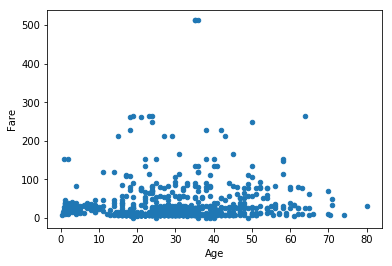

In [5]:
titanic_df.plot.scatter('Age', 'Fare');

In [9]:
titanic_df.Fare.max()

512.3292

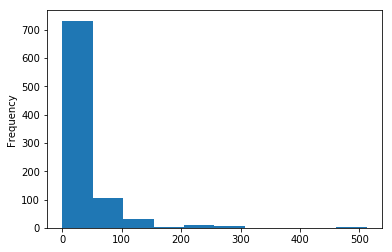

In [10]:
titanic_df.Fare.plot.hist()

Yikes! Looks like some 30somethings paid $512 dollars for their ticket. Hope they lived. 

Locate the row where the Fare column's value is $512. Create a markdown cell that answers "yes" or "no" to this question and maybe some analysis as to why.

Note that the exact value is "512.3292"

In [46]:
titanic_df[titanic_df['Fare'] == 512.3292]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


or

In [11]:
titanic_df[titanic_df['Fare'] > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


Using the age, fare, and survived columns, let's predict whether someone would have survived. 

First off, you may have noticed that our Titanic Dataset contains quite a few NaNs. Let's just drop those rows for this exercise

In [12]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
titanic_df.dropna(inplace=True)

Create a feature dataframe, X, with the "Age" and "Fare" columns and a target dataframe, y, with the "Survived" column

In [14]:
feature_cols = ['Age', 'Fare']
X = titanic_df[feature_cols]
y = titanic_df['Survived']

Train/test/split our X and y. 

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)

Import KNN Classifier from sklearn's neighbor library

In [17]:
from sklearn.neighbors import KNeighborsClassifier

Instantiate the model

In [18]:
knn_clf = KNeighborsClassifier()

Fit the model to the training data 

In [19]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

What's the score of our model? Remember: you can use our instantiated model's built in score feature and feed it our X and y test variables

In [20]:
knn_clf.score(X_test, y_test)

0.6545454545454545

Let's run a prediction on our X_test data.

In [21]:
knn_clf.predict(X_test)

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

Now let's predict on some totally novel data! Let's pretend a passenger who was 45 years old and paid $30 was on the Titanic. Would they have survived?

In [24]:
some_fake_passenger = [[45, 35]]

In [25]:
knn_clf.predict(some_fake_passenger)

array([1])

## Dunk it!

Can you do all of the above after tuning hyperparameters with GridSearchCV?

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [28]:
knn_param_grid = {
    'p':[1,2],
    'n_neighbors':range(1,45,2)
}

In [29]:
knn2 = KNeighborsClassifier()

In [30]:
gs_knn = GridSearchCV(knn2, knn_param_grid, cv=7, n_jobs=-1)

In [31]:
gs_knn.fit(X_train, y_train)

GridSearchCV(cv=7, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'p': [1, 2], 'n_neighbors': range(1, 45, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
pd.DataFrame(gs_knn.cv_results_)

In [35]:
gs_knn.best_params_

{'n_neighbors': 5, 'p': 1}

In [36]:
gs_knn.score(X_test, y_test)

0.6363636363636364